In [7]:
# Step 10 - 2D Poisson Equation

In [8]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [9]:
nx = 50
ny = 50
nt = 100 # psuedo-time
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

p = numpy.zeros((ny, nx))
pd = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
x = numpy.linspace(xmin, xmax, nx)
y = numpy.linspace(ymin, ymax, ny)

b[int(ny/4), int(nx/4)] = 100
b[int(3*ny/4), int(3*nx/4)] = -100

In [10]:
for iter in range(nt):
    pd = p.copy()

    p[1:-1,1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2]) * dy**2 +
                    (pd[2:, 1:-1] + pd[:-2, 1:-1]) * dx**2 -
                    b[1:-1, 1:-1] * dx**2 * dy**2) / 
                    (2 * (dx**2 + dy**2)))
    p[0, :] = 0
    p[-1, :] = 0
    p[:, 0] = 0
    p[:, -1] = 0

In [11]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

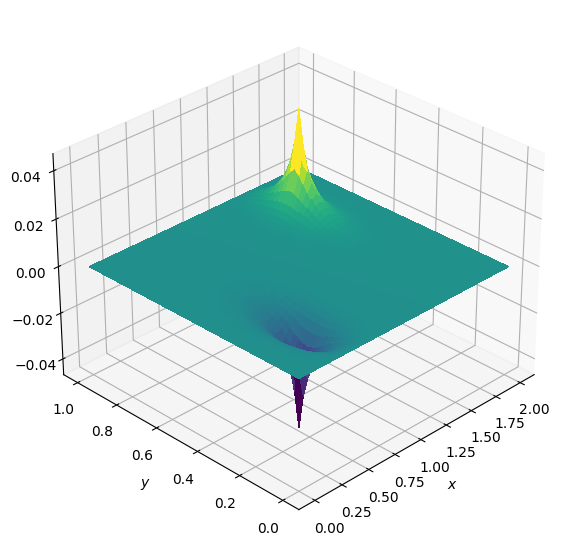

In [12]:
plot2D(x, y, p)